In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import pandas as pd
import vizro.plotly.express as px

from vizro import Vizro
from vizro_ai import VizroAI

# vizro_ai = VizroAI(model="gpt-4-turbo")
# vizro_ai = VizroAI(model="gpt-4o")
vizro_ai = VizroAI()

In [3]:
df1 = px.data.gapminder()

In [4]:
df2 = px.data.stocks()

# Example: Simple dashboard request

In [5]:
user_question_2_data = """
I need a page with 1 table.
The table shows the tech companies stock data.

I need a second page showing 2 cards and one chart.
The first card says 'The Gapminder dataset provides historical data on countries' development indicators.'
The chart is a scatter plot showing life expectancy vs. GDP per capita by country. Life expectancy on the y axis, GDP per capita on the x axis, and colored by continent.
The second card says 'Data spans from 1952 to 2007 across various countries'
The layout uses a grid of 3 columns and 2 rows.

Row 1: The first row has three columns:
The first column is occupied by the first card.
The second and third columns are spanned by the chart.

Row 2: The second row mirrors the layout of the first row with respect to chart, but the first column is occupied by the second card.

Add a filter to filter the scatter plot by continent.
Add a second filter to filter the chart by year.
"""

Store df info:   0%|          | 0/2 [00:00<?, ?it/s]

/Users/Alexey_Snigir/anaconda3/envs/vizro_ai/lib/python3.9/site-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The method `ChatOpenAI.with_structured_output` is in beta. It is actively being worked on, so the API may change.
  warn_beta(


df_name: tech_companies_stock_data
df_name: tech_stocks_data


Generate dashboard plan:   0%|          | 0/2 [00:00<?, ?it/s]

Building page: Tech Companies Stock Data Table:   0%|          | 0/5 [00:00<?, ?it/s]

Building page: Country Development Indicators Visualization:   0%|          | 0/5 [00:00<?, ?it/s]

Currently Building ... [Page] <Country Development Indicators Visualization> components:   0%|          | 0/3 …

Currently Building ... [Page] <Tech Companies Stock Data Table> components:   0%|          | 0/1 [00:00<?, ?it…

Currently Building ... [Page] <Tech Companies Stock Data Table> controls: 0it [00:00, ?it/s]

/Users/Alexey_Snigir/anaconda3/envs/vizro_ai/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


Currently Building ... [Page] <Country Development Indicators Visualization> controls:   0%|          | 0/2 [0…

/Users/Alexey_Snigir/anaconda3/envs/vizro_ai/lib/python3.9/site-packages/langchain_core/utils/function_calling.py:103: UserWarning:

CapturedCallable function is excluded from the schema.

/Users/Alexey_Snigir/anaconda3/envs/vizro_ai/lib/python3.9/site-packages/langchain_core/utils/function_calling.py:103: UserWarning:

CapturedCallable function is excluded from the schema.



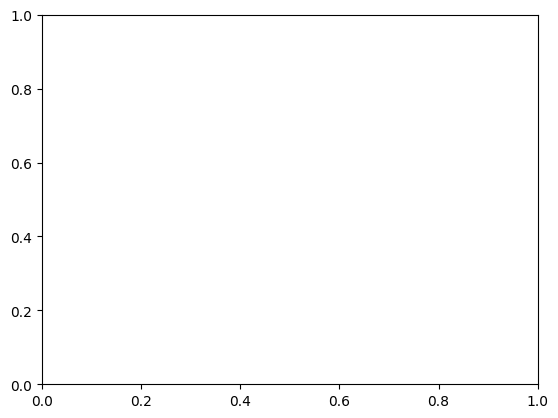

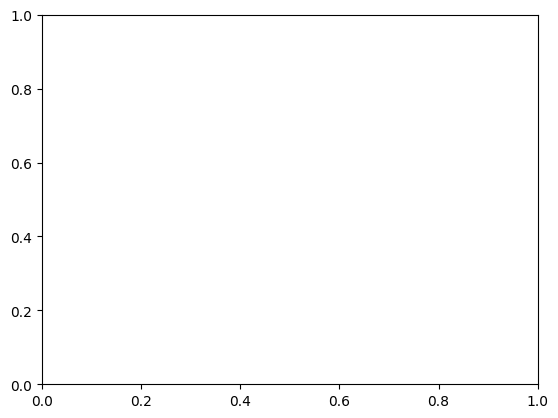

In [6]:
dashboard = vizro_ai.dashboard([df1, df2], user_question_2_data)

In [26]:
dashboard

Dashboard(id='b4862b21-fb97-d435-8856-1712e8e5216a', pages=[Page(id='Tech Companies Stock Data Table', components=[AgGrid(id='table_tech_stock', type='ag_grid', figure=<vizro.models.types.CapturedCallable object at 0x1692770a0>, title='', actions=[])], title='Tech Companies Stock Data Table', description='', layout=Layout(id='e3e70682-c209-4cac-629f-6fbed82c07cd', grid=[[0]], row_gap='24px', col_gap='24px', row_min_height='0px', col_min_width='0px'), controls=[], path='/tech-companies-stock-data-table', actions=[]), Page(id='Country Development Indicators Visualization', components=[Card(id='card1', type='card', text="The Gapminder dataset provides historical data on countries' development indicators.", href=''), Graph(id='scatter_plot', type='graph', figure=<vizro.models.types.CapturedCallable object at 0x169d46580>, actions=[]), Card(id='card2', type='card', text='Data spans from 1952 to 2007 across various countries..', href='')], title='Country Development Indicators Visualization'

In [36]:
[components.type for components in dashboard.pages[1].components]

['card', 'graph', 'card']

In [35]:
from hamcrest import all_of, any_of, assert_that, contains_string, equal_to, contains_inanyorder

comps = [components.id for components in dashboard.pages[1].components]
assert_that(comps, contains_inanyorder('card1', 'scatter_plot', 'card2'))

AssertionError: 
Expected: a sequence over ['card1', 'scatter_plot', 'card'] in any order
     but: not matched: 'card2'


In [ ]:
Vizro().build(dashboard).run()

# Example: 5-page dashboard request

In [39]:
df3 = px.data.tips()

In [48]:
user_question_3_data = """
I need only 4 pages

<Page 1>
I need a page with 1 table and 1 line chart. 
The chart shows the stock price trends of GOOG and AAPL.
The table shows the stock prices data details.

<Page 2>
I need a second page showing 1 card and 1 chart.
The card says 'The Gapminder dataset provides historical data on countries' development indicators.'
The chart is a scatter plot showing GDP per capita vs. life expectancy. GDP per capita on the x axis, life expectancy on the y axis, and colored by continent.
Layout the card on the left and the chart on the right. The card takes 1/3 of the whole space on the left.
The chart takes 2/3 of the whole space and is on the right.
Add a filter to filter the scatter plot by continent.
Add a second filter to filter the chart by year.

<Page 3>
This page displays the tips dataset. use two different charts to show data
distributions. one chart should be a bar chart and the other should be a scatter plot.
first chart is on the left and the second chart is on the right.
Add a filter to filter data in the scatter plot by smoker.

<Page 4>
Create 3 cards on this page:
1. The first card on top says "This page combines data from various sources including tips, stock prices, and global indicators."
2. The second card says "Insights from Gapminder dataset."
3. The third card says "Stock price trends over time."

Layout these 3 cards in this way:
create a grid with 3 columns and 2 rows.
Row 1: The first row has three columns:
- The first column is empty.
- The second and third columns span the area for card 1.

Row 2: The second row also has three columns:
- The first column is empty.
- The second column is occupied by the area for card 2.
- The third column is occupied by the area for card 3.
"""

Store df info:   0%|          | 0/3 [00:00<?, ?it/s]

df_name: world_development_indicators
df_name: stock_price_trends
df_name: tips_data


Generate dashboard plan:   0%|          | 0/2 [00:00<?, ?it/s]

Building page: Stock Price Trends:   0%|          | 0/5 [00:00<?, ?it/s]

Building page: Tips Dataset Visualization:   0%|          | 0/5 [00:00<?, ?it/s]

Building page: Gapminder Dataset Insights:   0%|          | 0/5 [00:00<?, ?it/s]

Building page: Combined Data Insights:   0%|          | 0/5 [00:00<?, ?it/s]

Currently Building ... [Page] <Stock Price Trends> components:   0%|          | 0/2 [00:00<?, ?it/s]

Currently Building ... [Page] <Combined Data Insights> components:   0%|          | 0/3 [00:00<?, ?it/s]

Currently Building ... [Page] <Tips Dataset Visualization> components:   0%|          | 0/2 [00:00<?, ?it/s]

Currently Building ... [Page] <Gapminder Dataset Insights> components:   0%|          | 0/2 [00:00<?, ?it/s]

Currently Building ... [Page] <Combined Data Insights> controls: 0it [00:00, ?it/s]

Currently Building ... [Page] <Tips Dataset Visualization> controls:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/Alexey_Snigir/anaconda3/envs/vizro_ai/lib/python3.9/site-packages/langchain_core/utils/function_calling.py:103: UserWarning:

CapturedCallable function is excluded from the schema.



Currently Building ... [Page] <Stock Price Trends> controls: 0it [00:00, ?it/s]

Currently Building ... [Page] <Gapminder Dataset Insights> controls:   0%|          | 0/2 [00:00<?, ?it/s]

/Users/Alexey_Snigir/anaconda3/envs/vizro_ai/lib/python3.9/site-packages/langchain_core/utils/function_calling.py:103: UserWarning:

CapturedCallable function is excluded from the schema.

/Users/Alexey_Snigir/anaconda3/envs/vizro_ai/lib/python3.9/site-packages/langchain_core/utils/function_calling.py:103: UserWarning:

CapturedCallable function is excluded from the schema.



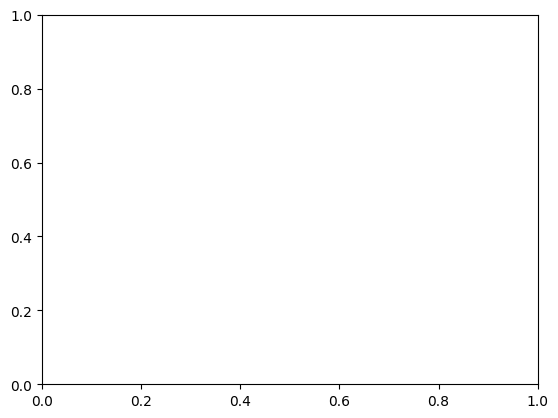

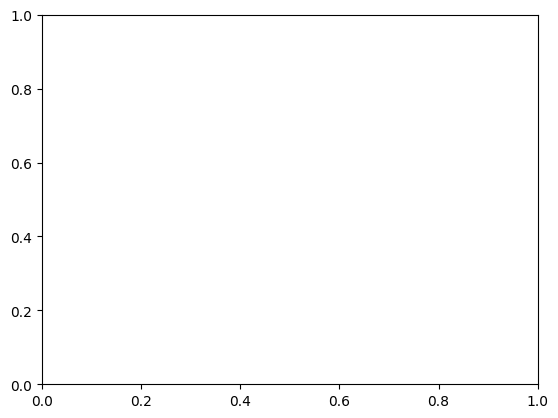

In [41]:
Vizro._reset()
dashboard = vizro_ai.dashboard([df1, df2, df3], user_question_3_data)

In [42]:
dashboard

Dashboard(id='247a8333-f7b0-b7d2-cda8-056c3d15eef7', pages=[Page(id='Stock Price Trends', components=[AgGrid(id='stock_prices_table', type='ag_grid', figure=<vizro.models.types.CapturedCallable object at 0x16af19970>, title='', actions=[]), Graph(id='stock_prices_line_chart', type='graph', figure=<vizro.models.types.CapturedCallable object at 0x16af34ac0>, actions=[])], title='Stock Price Trends', description='', layout=Layout(id='85776e9a-dd84-f39e-7154-5a137a1d5006', grid=[[0, 1]], row_gap='24px', col_gap='24px', row_min_height='0px', col_min_width='0px'), controls=[], path='/stock-price-trends', actions=[]), Page(id='Gapminder Dataset Insights', components=[Card(id='gapminder_card', type='card', text="The Gapminder dataset provides historical data on countries' development indicators.", href=''), Graph(id='gapminder_scatter_plot', type='graph', figure=<vizro.models.types.CapturedCallable object at 0x16af33520>, actions=[])], title='Gapminder Dataset Insights', description='', layout

In [44]:
assert_that(len(dashboard.pages), equal_to(4))

Store df info:   0%|          | 0/3 [00:00<?, ?it/s]

df_name: world_indicators
df_name: stock_prices_trends
df_name: tips_data


Generate dashboard plan:   0%|          | 0/2 [00:00<?, ?it/s]

Building page: Data Fusion Insights:   0%|          | 0/5 [00:00<?, ?it/s]

Building page: Gapminder Dataset Insights:   0%|          | 0/5 [00:00<?, ?it/s]

Building page: Stock Prices Overview:   0%|          | 0/5 [00:00<?, ?it/s]

Building page: Tips Dataset Analysis:   0%|          | 0/5 [00:00<?, ?it/s]

Currently Building ... [Page] <Stock Prices Overview> components:   0%|          | 0/2 [00:00<?, ?it/s]

Currently Building ... [Page] <Tips Dataset Analysis> components:   0%|          | 0/2 [00:00<?, ?it/s]

Currently Building ... [Page] <Data Fusion Insights> components:   0%|          | 0/3 [00:00<?, ?it/s]

Currently Building ... [Page] <Gapminder Dataset Insights> components:   0%|          | 0/2 [00:00<?, ?it/s]

Currently Building ... [Page] <Data Fusion Insights> controls: 0it [00:00, ?it/s]

[FALLBACK] Build failed for `Layout`, returning default values. Try rephrase the prompt or select a different model.
Error details: 1 validation error for Layout
grid
  Grid must contain consecutive integers starting from 0. (type=value_error)
Relevant prompt: Create a grid with 3 columns and 2 rows. Layout the cards as specified., which was parsed as layout_grid_template_areas:
['. card1 card1', '. card2 card3']



Currently Building ... [Page] <Stock Prices Overview> controls: 0it [00:00, ?it/s]

Currently Building ... [Page] <Tips Dataset Analysis> controls:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/Alexey_Snigir/anaconda3/envs/vizro_ai/lib/python3.9/site-packages/langchain_core/utils/function_calling.py:103: UserWarning:

CapturedCallable function is excluded from the schema.

[FALLBACK] Build failed for `Layout`, returning default values. Try rephrase the prompt or select a different model.
Error details: 1 validation error for Layout
grid
  Grid must contain consecutive integers starting from 0. (type=value_error)
Relevant prompt: The first chart is on the left and the second chart is on the right., which was parsed as layout_grid_template_areas:
['bar_chart scatter_plot']

[FALLBACK] Failed to build `Component`: gapminder_chart.
Reason: Chart creation failed. Retry debugging has reached maximum limit. Try to rephrase the prompt, or try to select a different model. Fallout response is provided: 

Failed to debug code from vizro.models.types import capture
import plotly.express as px
import pandas as pd
@capture('graph')
def custom_chart(data_frame):
    df_copy = data_fr

Currently Building ... [Page] <Gapminder Dataset Insights> controls:   0%|          | 0/2 [00:00<?, ?it/s]

/Users/Alexey_Snigir/anaconda3/envs/vizro_ai/lib/python3.9/site-packages/langchain_core/utils/function_calling.py:103: UserWarning:

CapturedCallable function is excluded from the schema.

[FALLBACK] Build failed for `Control`, returning default values. Try rephrase the prompt or select a different model.
Error details: 1 validation error for FilterProxy
targets
  
                This might be due to the filter target is not found in the controllable components.
                returning default values.
                 (type=value_error)
Relevant prompt: Add a filter to filter the scatter plot by continent.

/Users/Alexey_Snigir/anaconda3/envs/vizro_ai/lib/python3.9/site-packages/langchain_core/utils/function_calling.py:103: UserWarning:

CapturedCallable function is excluded from the schema.

[FALLBACK] Build failed for `Control`, returning default values. Try rephrase the prompt or select a different model.
Error details: 1 validation error for FilterProxy
targets
  
              

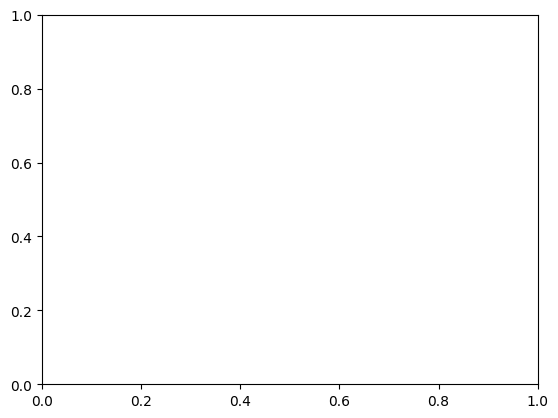

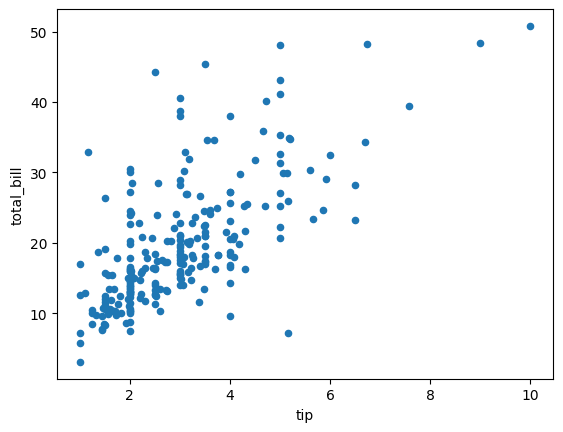

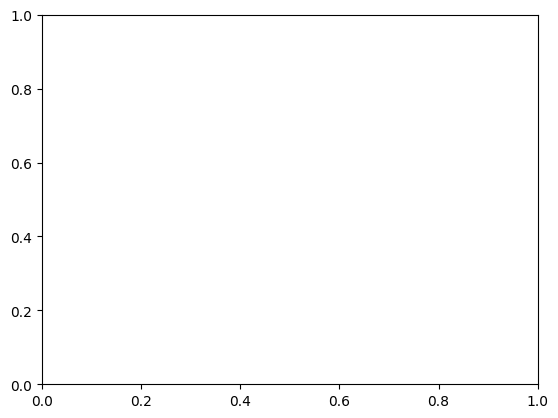

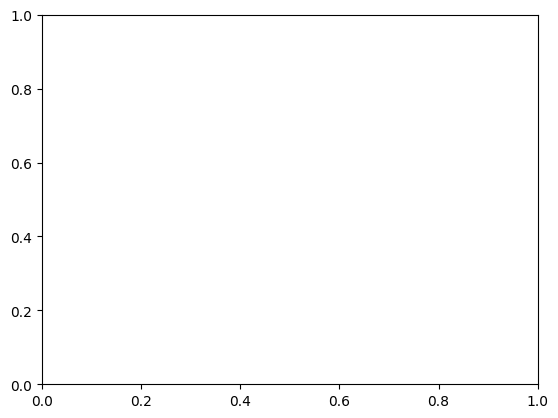

In [49]:
Vizro._reset()
dashboard = vizro_ai.dashboard([df1, df2, df3], user_question_3_data)

In [ ]:
Vizro().build(dashboard).run()

# Example: Request with unsupported features

In [50]:
user_question_2_data = """
<Page 1>
I need a page showing 2 cards, one chart, and 1 button.
The first card says 'The Tips dataset provides insights into customer tipping behavior.'
The chart is a bar chart showing the total bill amount by day. Day on the x axis, total bill amount on the y axis, and colored by time of day.
The second card says 'Data collected from various days and times.'
Layout the two cards on the left and the chart on the right. Two cards take 1/3 of the whole space on the left in total.
The first card is on top of the second card vertically.
The chart takes 2/3 of the whole space and is on the right.
The button would trigger a download action to download the Tips dataset.
Add a filter to filter the bar chart by `size`.
Make another tab on this page,
In this tab, create a card saying "Tipping patterns and trends."
Group all the above content into the first NavLink.

<Second NavLink>
Create two pages:
1. The first page has a card saying "Analyzing global development trends."
2. The second page has a scatter plot showing GDP per capita vs. life expectancy. GDP per capita on the x axis, life expectancy on the y axis, and colored by continent.
Add a parameter to control the title of the scatter plot, with title options "Economic Growth vs. Health" and "Development Indicators."
Also create a button and a spinning circle on the right-hand side of the page.

<Third NavLink>
Create one page:
1. The first page has a card saying "Stock price trends over time."
Create a button and a spinning circle on the right-hand side of the page.

For hosting the dashboard on AWS, which service should I use?
"""

In [51]:
Vizro._reset()
dashboard = vizro_ai.dashboard([df3, df2, df1], user_question_2_data)

Store df info:   0%|          | 0/3 [00:00<?, ?it/s]

df_name: tips_dataset
df_name: tipping_insights
df_name: global_development_data


Generate dashboard plan:   0%|          | 0/2 [00:00<?, ?it/s]

 ------- 
 Unsupported specs on page <Global Development Trends>: 
 ['Parameter to control scatter plot title']


ValueError: 
            Failed to create a valid dashboard plan. Try rephrase the prompt or select a different
            model. Error details:
            2 validation errors for DashboardPlanner
pages -> 2 -> components_plan -> 1 -> component_type
  unexpected value; permitted: 'AgGrid', 'Card', 'Graph' (type=value_error.const; given=Button; permitted=('AgGrid', 'Card', 'Graph'))
pages -> 2 -> components_plan -> 2 -> component_type
  unexpected value; permitted: 'AgGrid', 'Card', 'Graph' (type=value_error.const; given=Spinner; permitted=('AgGrid', 'Card', 'Graph'))
            

In [52]:
dashboard

Dashboard(id='e66cd36e-68ef-8f5f-ae68-690a78bc7175', pages=[Page(id='Stock Prices Overview', components=[AgGrid(id='stock_prices_table', type='ag_grid', figure=<vizro.models.types.CapturedCallable object at 0x177e7f7f0>, title='', actions=[]), Graph(id='stock_prices_chart', type='graph', figure=<vizro.models.types.CapturedCallable object at 0x176e22c10>, actions=[])], title='Stock Prices Overview', description='', layout=Layout(id='0fa07a3f-2e29-5065-6fa2-31e959acdd98', grid=[[0], [1]], row_gap='24px', col_gap='24px', row_min_height='0px', col_min_width='0px'), controls=[], path='/stock-prices-overview', actions=[]), Page(id='Gapminder Dataset Insights', components=[Card(id='gapminder_card', type='card', text="The Gapminder dataset provides historical data on countries' development indicators.", href=''), Card(id='gapminder_chart', type='card', text='Failed to build component: gapminder_chart', href='')], title='Gapminder Dataset Insights', description='', layout=Layout(id='0361524c-2c

In [ ]:
Vizro().build(dashboard).run()